In [2]:
import numpy as np
import pandas as pd

np.random.seed(5)

# 1. 문제 정의
* 서울 지역(구)의 경도와 위도 정보를 사용하며 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해보는 예제

# 2. 데이터 수집
아래는 서울의 대표적인 구(district) 위치 데이터
구(district) 정보는 학습에 사용하도록 함

* 컬럼 주석  
**district** : 행정구역(서초구, 송파구, 용산구 등 서울의 단위 지역 분류  
**dong** : 구(district)보다 작은 행정구역(대치동, 도곡동, 암사동 등 서울의 소단위 분류)  
**latitude** : 위도  
**longitude** : 경도  
**label** : 한강 기준으로 동,서,남,북으로 구분한 지역 명칭

In [4]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district','latitude','longitude', 'label']]
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [6]:
# 현재 가지고 있는 데이터에서 레이블의 개수를 확인
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [7]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'latitude', 'longitude', 'label']]
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [8]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

레이블의 개수를 확인한 결과, 데이터는 Gangbuk(강북), Gangdong(강동), Gangseo(강서), Gangnam(강남)이라는 4가지 분류값을 가지고 있음  
이번 예제에서는 위도와 경도 정보만으로 그 지역의 레이블을 예측해볼 수 있도록 데이터를 전처리

## 데이터 전처리
먼저, 경도와 위도의 평균과 편차를 보도록 함

In [9]:
train_df.describe()

# R의 summary

,latitude,longitude
count,20.000000,20.000000
mean,37.547909,126.999772
std,0.055086,0.089387
min,37.451900,126.849500
25%,37.510177,126.913481
50%,37.552597,127.028844
75%,37.573690,127.056458
max,37.668800,127.151405


이번 예제는 의사결정트리 알고리즘으로 데이터를 분류  
의사결정트리는 각 특징을 독립적으로 사용하기 때문에, 이번 예제에서는 별다른 전처리 과정이 필요없음

# 데이터 시각화

Text(0.5, 1.0, 'district visualization in 2d plane')

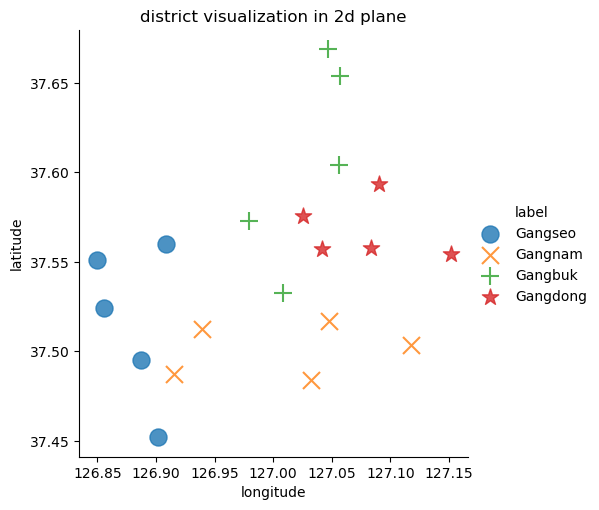

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(train_df, x='longitude', y='latitude', fit_reg=False, hue='label', markers=['o','x','+','*'], scatter_kws={'s':150})
plt.title('district visualization in 2d plane')

## 데이터 다듬기
학습 및 테스트에 필요 없는 특징(feature)을 데이터에서 제거  
구 이름 및 동 이름은 필요없기 때문에 제거

In [11]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

In [13]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

# 3. 모델구현

In [14]:
from sklearn import tree
from sklearn import preprocessing

In [30]:
clf = tree.DecisionTreeClassifier(random_state=35)

# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)    # 레이블을 숫자로 매핑

print(y_encoded)

#강서-3 강남-2 강북-0 강동-1 로 매핑

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
clf.fit(X_train, y_encoded ) #최적의 값이 clf에 저장됨

DecisionTreeClassifier(random_state=35)

In [39]:
def display_decision_surface(clf, X, y, le) : 
    
    #차트의 범위가 모든 학습 데이터를 포함하도록 설정
    #누락되는 것 방지
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)  #범주의 개수가 저장되어 있음 : 4가지
    plot_colors = 'rwyb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                np.arange(y_min, y_max, plot_step))  #정방행렬 생성
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #1차원배열로
    Z = Z.reshape(xx.shape) #본 shape로
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    #학습 데이터를 차트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude,
                    X.loc[idx].latitude,
                    c=color,
                    label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolors='black', s=200)

    # 차트 제목
    plt.title('Decision surface of a decision tree', fontsize=16)
    
    # 차트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=14)
    
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude', fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude', fontsize=16)
    # 차트 크기 설정
    plt.rcParams['figure.figsize']=[7, 5]
    # 차트 폰트 크기 설정
    plt.rcParams['font.size']=14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize']=14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams['ytick.labelsize']=14
    
    # 차트 그리기
    plt.show()
    

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,


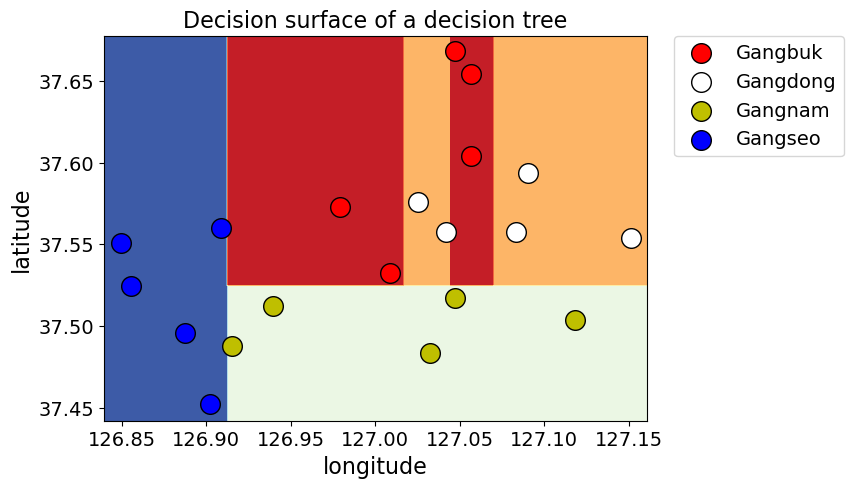

In [40]:
display_decision_surface(clf, X_train, y_encoded, le)

### 파라미터 의미
* random_state : 여러번 실행해도 파라미터가 같을 경우 결과가 항상 같게 만들어주는 파라미터  
* max _depth: tree의 최대 한도 깊이  
* min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 개수  
* min_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 개수  

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6852\1493407563.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,


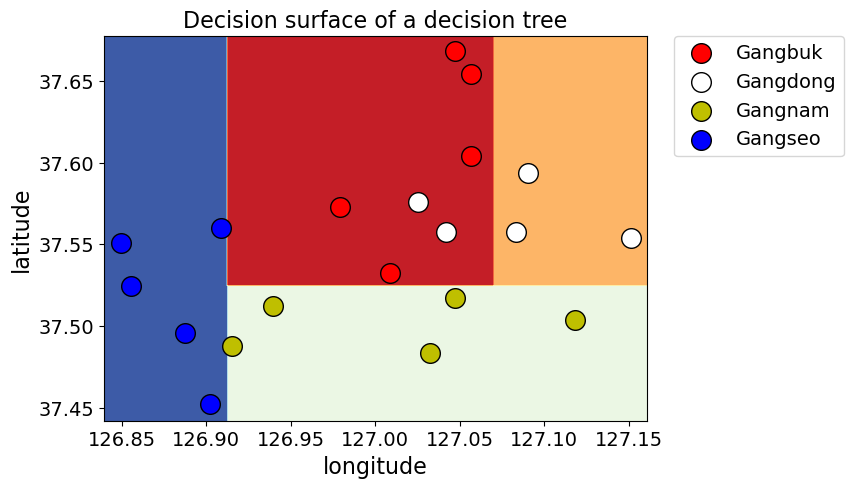

In [41]:
clf = tree.DecisionTreeClassifier(random_state=35, max_depth=4, min_samples_split=2, min_samples_leaf=2)

clf.fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded, le)

### 의사결정트리 시각화

In [50]:
import graphviz

# conda install graphviz 로 안되면...
# conda install -c anaconda python-graphviz
# conda install -c anaconda pydot

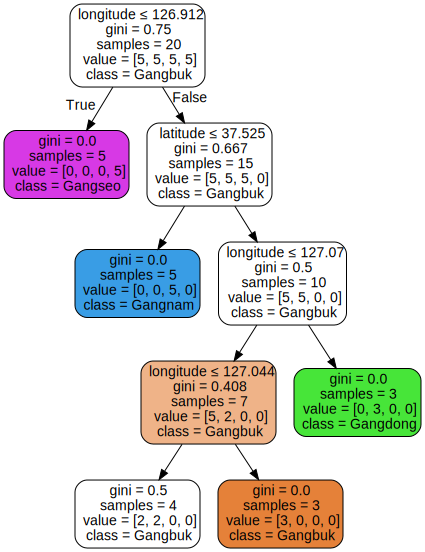

In [51]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('seoul')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

# 5. 테스트

In [53]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), le.classes_[pred]))) 

accuracy : 1.0


In [54]:
comprison = pd.DataFrame({'모델예측값:': le.classes_[pred], '정답:':y_test.values.ravel()})
comprison

,모델예측값:,정답:
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
